In [39]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
import datetime

In [25]:
today = datetime.datetime.now().strftime("%d-%m")

confirmed = pd.read_csv(f"../datasets/confirmed_{today}.csv")
deaths = pd.read_csv(f"../datasets/deaths_{today}.csv")
recovered = pd.read_csv(f"../datasets/recovered_{today}.csv")

In [90]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,22,22,22,24,24,40,40,74,84,94
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,55,59,64,70,76,89,104,123,146,174
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,60,74,87,90,139,201,230,264,302,367
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,39,39,53,75,88,113,133,164,188,224
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,1,2,2,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,NaN,Mali,17.570692,-3.996166,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,4
244,NaN,Saint Kitts and Nevis,17.357822,-62.782998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
245,Northwest Territories,Canada,64.825500,-124.845700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246,Yukon,Canada,64.282300,-135.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [146]:
def summed_and_max(df):
    summed = df.drop(["Lat", "Long"], axis=1).groupby("Country/Region").sum()
    max_countries = list(summed.iloc[:,-1].nlargest(5).index)
    return (summed, max_countries)

# Infection Speed

In [152]:
def plot_data(df, graph_title):
    summed, max_countries = summed_and_max(df)
    colors = ["red", "#5A2881", "green", "magenta", "#E2C539", "blue"]

    for i in range(summed.shape[0]):
        top_label=None
        top_line_width=None
        top_color=None
        if summed.index[i] in max_countries:
            top_label = summed.index[i]
            top_line_width = 5.0
            top_color = colors[max_countries.index(summed.index[i])]

        plt.plot(summed.iloc[i], label=top_label, linewidth=top_line_width, color=top_color)
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False
        )
    plt.legend()
    plt.title(graph_title, fontsize=25)
    fig = plt.gcf()
    fig.set_size_inches(15,5)
    plt.show()

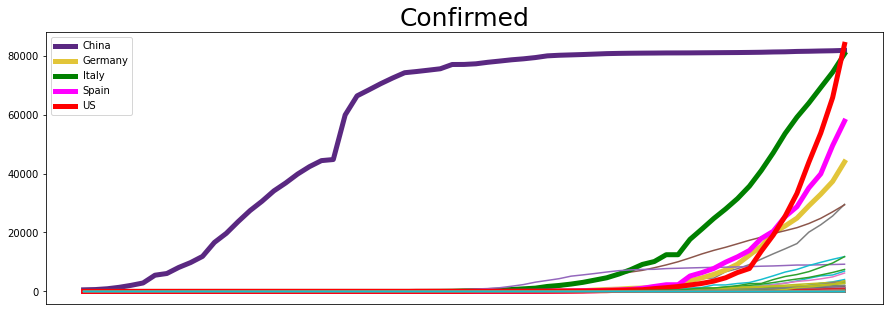

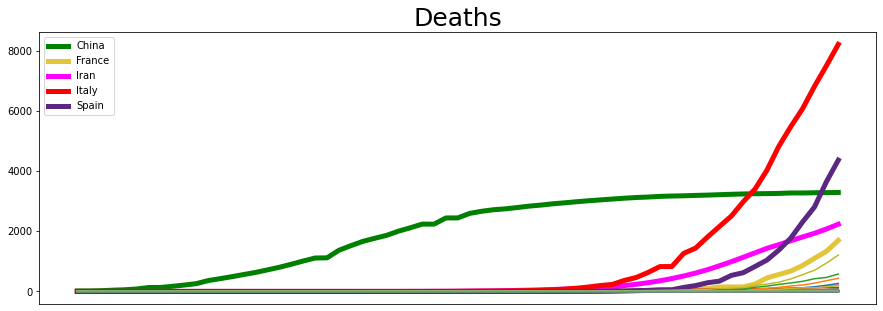

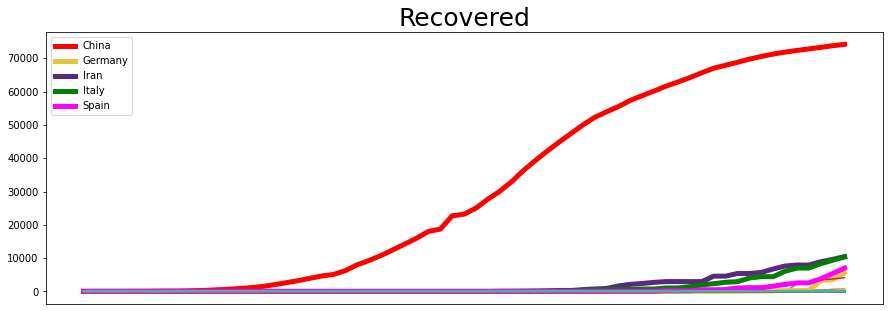

In [154]:
plot_data(confirmed, "Confirmed")
plot_data(deaths, "Deaths")
plot_data(recovered, "Recovered")

# Patient 0

In [ ]:
# Add Israel to the bold plot
# Make colors same in every plot (per country)
# plot only last month
# Maybe Remove China because they are boring now